In [160]:
# Import library dataframe
import numpy as np
from numpy import mean
import pandas as pd

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

In [161]:
df = pd.read_csv("CC GENERAL.csv")

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Keterangan dataset:**

Dataset ini berisi 18 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri dan dapat dikelompokkan sebagai berikut:

1. Balance
    - `BALANCE` = Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian
    - `BALANCE_FREQUENCY` = Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 : sering diperbarui, 0 : tidak sering diperbarui)

2. Purchases
    - `PURCHASES` = Jumlah pembelian yang dilakukan dari akun
    - `ONEOFF_PURCHASES` = Jumlah pembelian maksimum dilakukan dalam sekali jalan
    - `INSTALLMENTS_PURCHASES` = Jumlah pembelian yang dilakukan secara mencicil

3. Purchases Frequency
    - `PURCHASES_FREQUENCY` Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 : sering dibeli, 0 : tidak sering dibeli)
    - `ONEOFF_PURCHASES_FREQUENCY` = Seberapa sering Pembelian terjadi dalam sekali jalan (1 : sering dibeli, 0 : tidak sering dibeli)
    - `PURCHASES_INSTALLMENTS_FREQUENCY` = Seberapa sering pembelian dengan mencicil dilakukan (1 : sering dilakukan, 0 : tidak sering dilakukan)
    - `PURCHASESTRX` = Jumlah transaksi pembelian yang dilakukan

4. Cash Advance
    - `CASHADVANCE` = Uang muka yang diberikan oleh pengguna
    - `CASHADVANCE_FREQUENCY` Seberapa sering uang muka dibayarkan
    - `CASH_ADVANCE_TRX` = Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"

5. Payments
    - `PAYMENTS` = Jumlah Pembayaran yang dilakukan oleh pengguna
    - `MINIMUM_PAYMENTS` = Jumlah minimum pembayaran yang dilakukan oleh pengguna
    - `PRC_FULL_PAYMENT` = Persentase pembayaran penuh yang dibayarkan oleh pengguna

6. Lainnya
    - `CUST_ID` = Identifikasi pemegang Kartu Kredit (Categorical)
    - `CREDIT_LIMIT` = Batas Kartu Kredit untuk pengguna
    - `TENURE` = Masa berlaku layanan kartu kredit untuk pengguna

In [162]:
df.shape

(8950, 18)

In [163]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [165]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [166]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# **C. DATA CLEANING**

In [167]:
# menghapus kolom cust_id
df.drop('CUST_ID', axis = 1,inplace= True)

In [168]:
# mengecek nilai Nan
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [169]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

BALANCE                              0.0 %
PAYMENTS                             0.0 %
PURCHASES_TRX                        0.0 %
CASH_ADVANCE_TRX                     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
PRC_FULL_PAYMENT                     0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
CASH_ADVANCE                         0.0 %
INSTALLMENTS_PURCHASES               0.0 %
ONEOFF_PURCHASES                     0.0 %
PURCHASES                            0.0 %
BALANCE_FREQUENCY                    0.0 %
PURCHASES_FREQUENCY                  0.0 %
TENURE                               0.0 %
CREDIT_LIMIT                        0.01 %
MINIMUM_PAYMENTS                     3.5 %
dtype: object

In [170]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [171]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X)

df['MINIMUM_PAYMENTS'] = X

In [172]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [173]:
# mengecek duplicate data
df.duplicated().value_counts()

False    8949
Name: count, dtype: int64

In [174]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **D. EXPLORATORY DATA ANALISIS (EDA)**

In [175]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Diperoleh informasi bahwa:
1. rata-rata saldo/Balance dari semua nasabah yaitu 1564 dollar
2. rata-rata saldo terupdate dari semua nasabah yakni 0,877 yang artinya mayoritas nasabah aktif mengupdate saldonya.
3. Purchases paling banyak yakni 49039.57 purchases
4. Credit limit minimal yaitu 50 dollar dan maksimal yaitu 30000 dollar.

## Melihat distribusi pada semua atribut

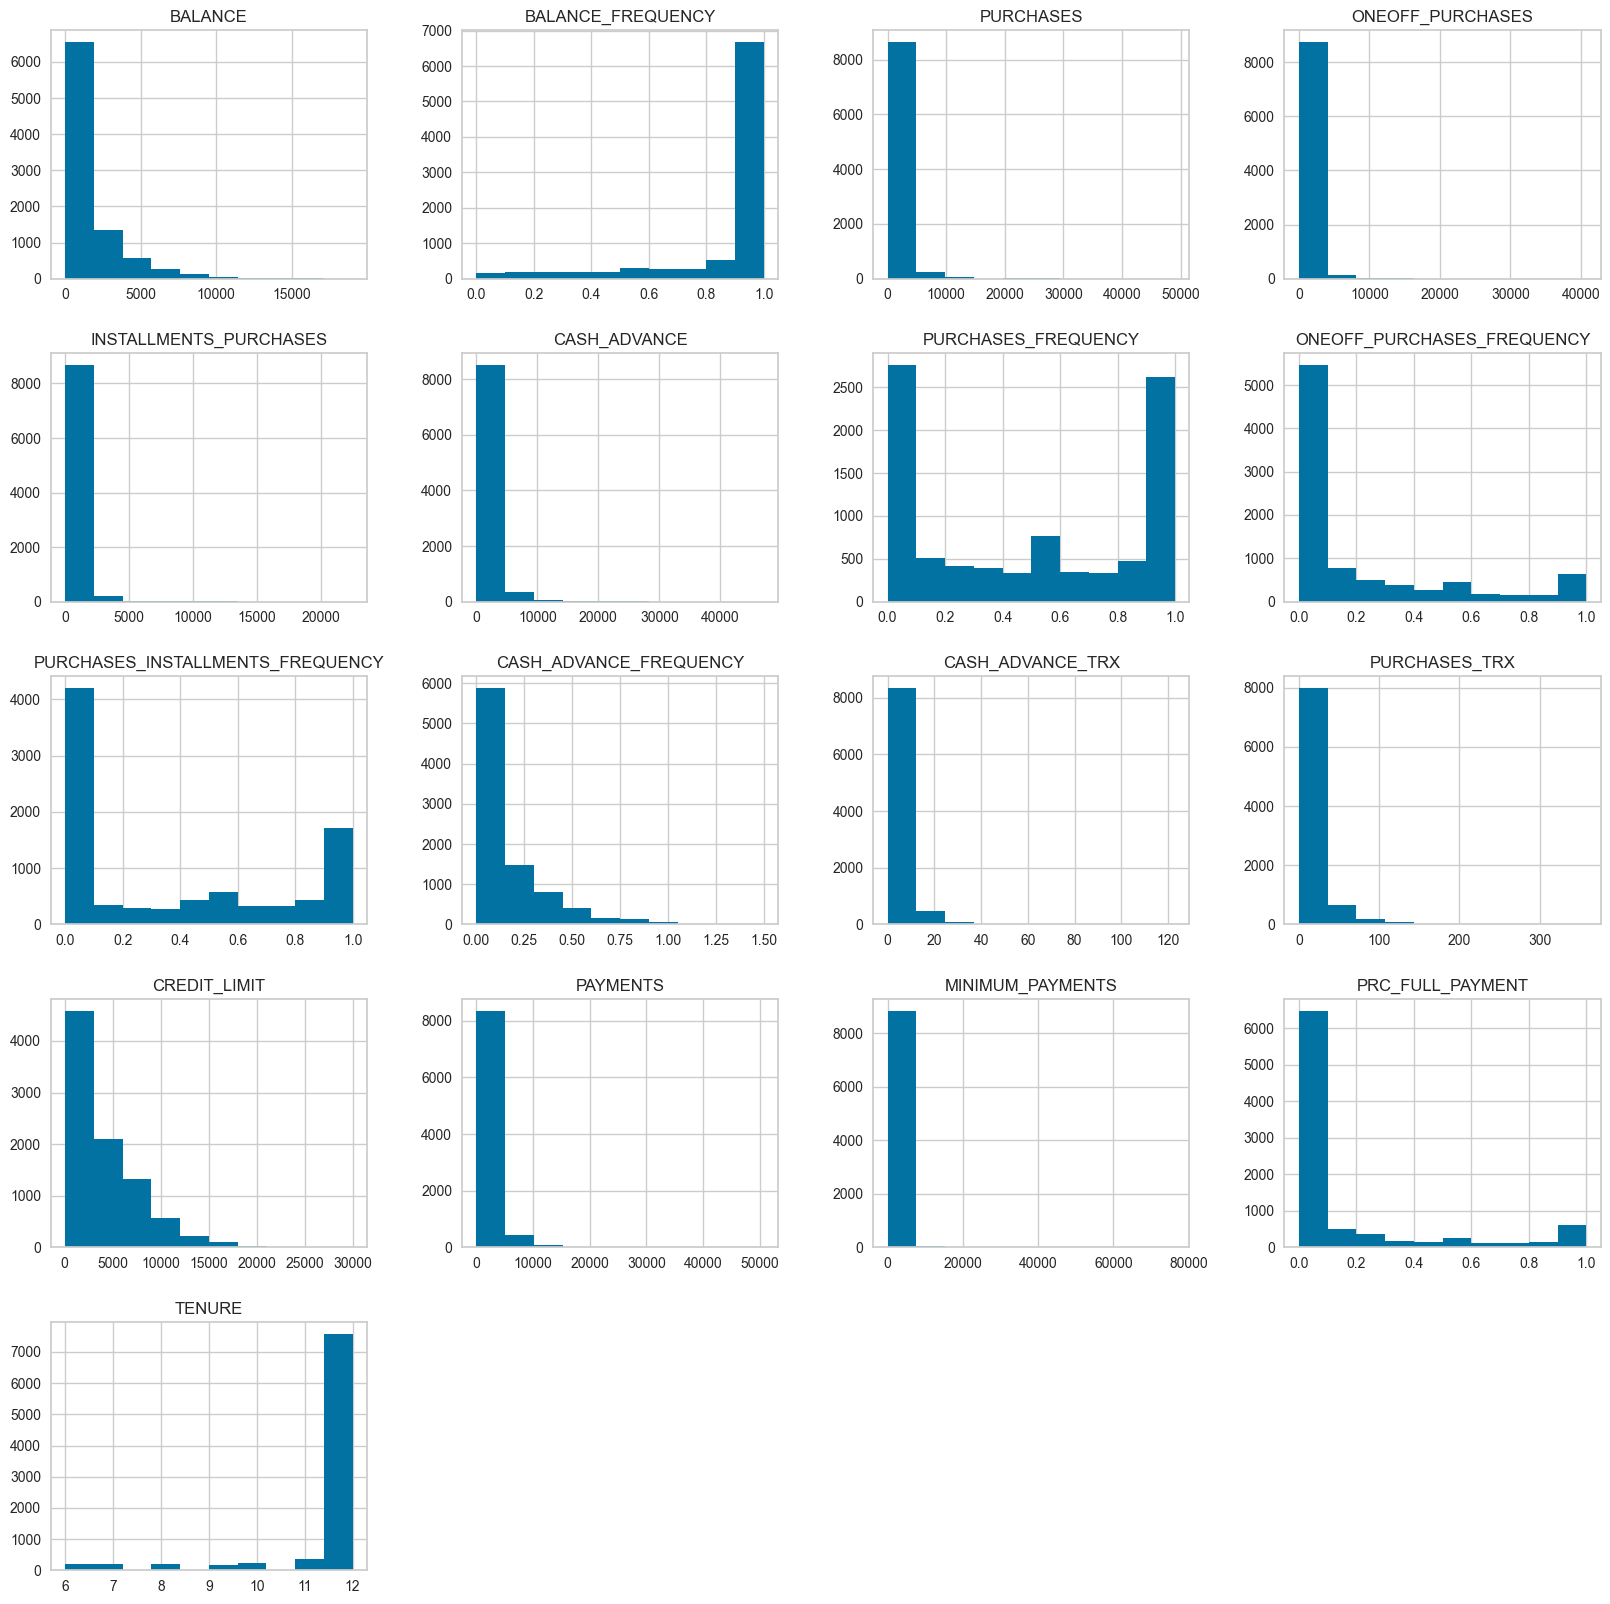

In [176]:
df.hist(bins=10, figsize = (20,20))
plt.show()

**Kesimpulan:**

Berdasarkan histogram terlihat bahwa semua terdapat banyak skewness dan sangat bervariasi. Skewness bervariasi dikarenakan ada beberapa pelanggan yang melakukan transaksi dalam jumlah yang sangat tinggi.

## Melihat histogram dari variabel frekuensi

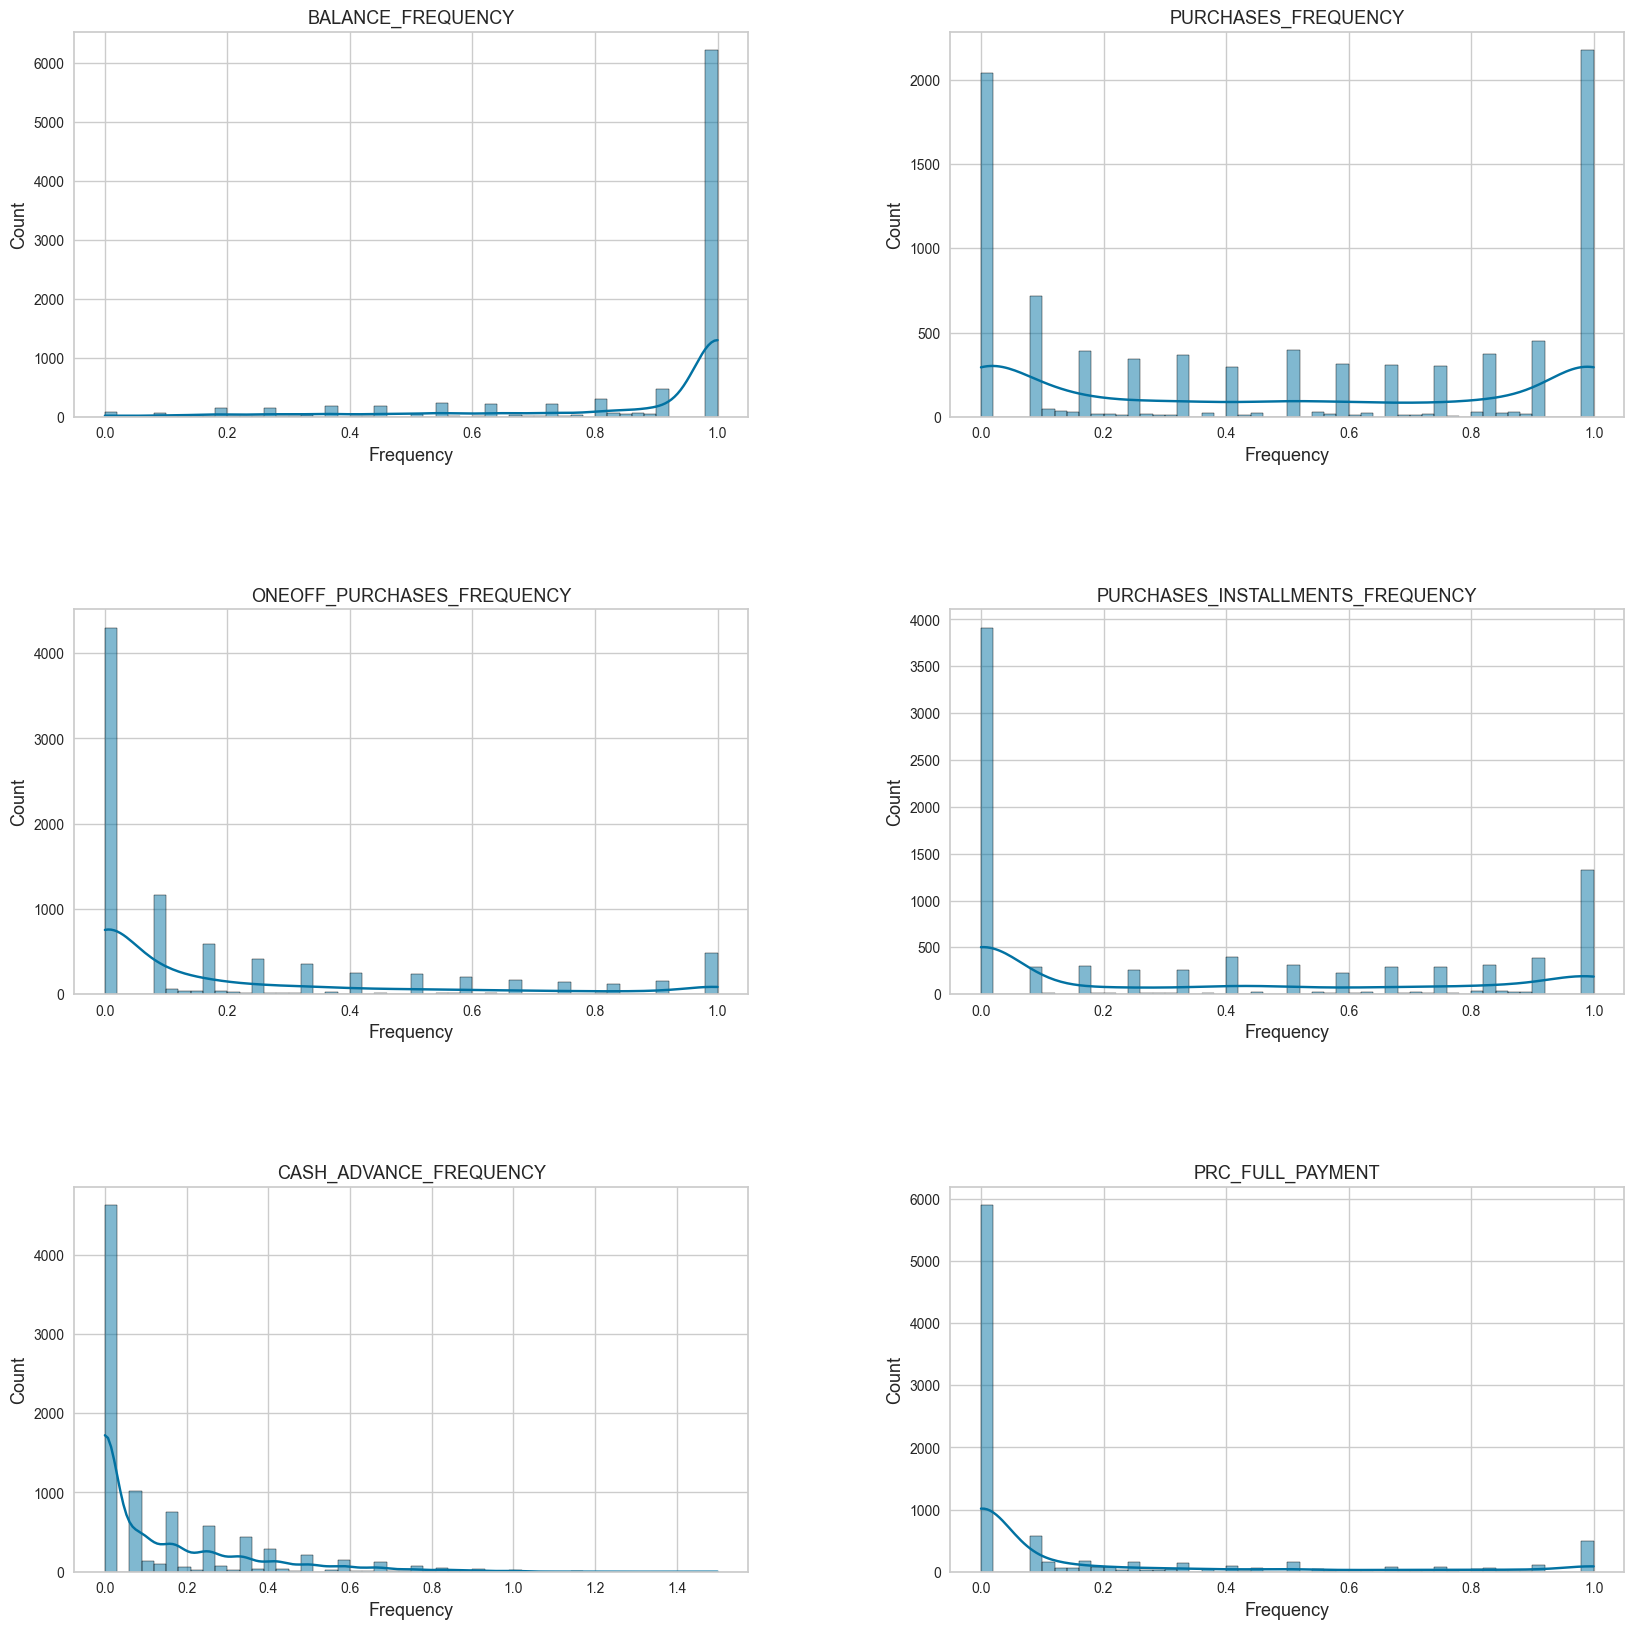

In [177]:
var_freq = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_freq):
    plt.subplot(3,2,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,kde=True)
    plt.savefig('variabel_frekuensi.png')


## Melihat Outlier

In [178]:
from scipy.stats import skew

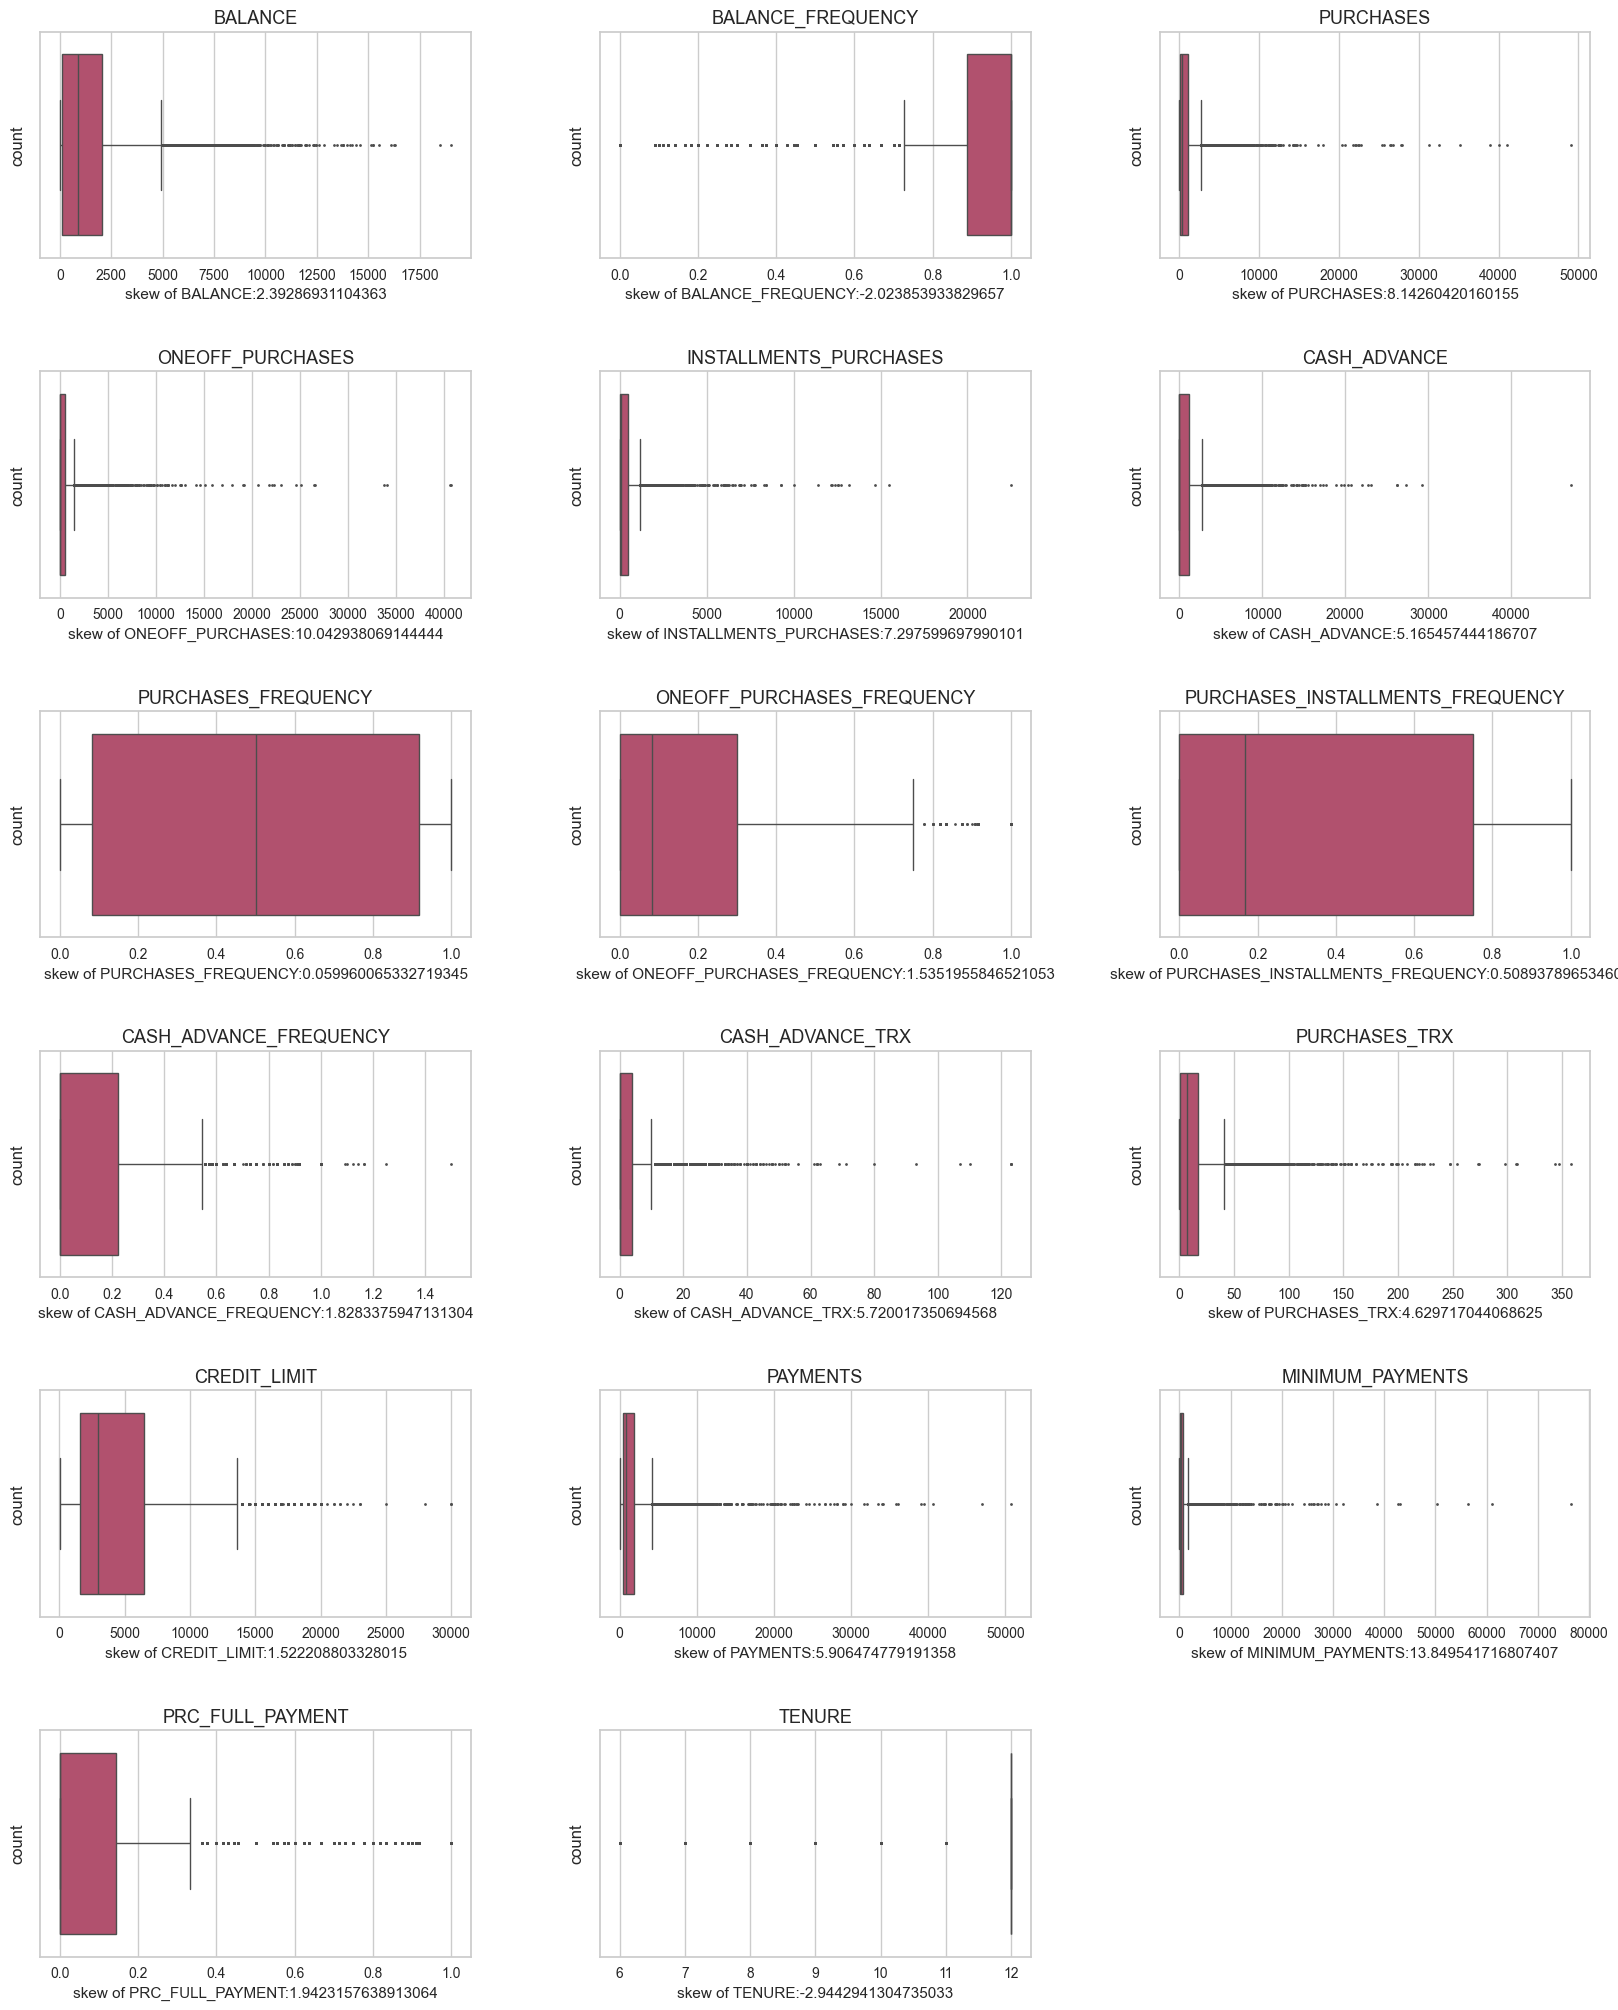

In [179]:
cols = df.columns.to_list()
plt.figure(figsize =(20,25))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

Dari analisisi diatas dapat bahwa terdapat outlier, namun outlier tersebut terlihat seperti outlier normal, bukan dari kesalahan input. Hal ini terjadi kemungkin dikarenakan ada nasabah yang bertransaksi dalam jumlah sangat besar dan juga melakaukan transaksi yang sangat jarang.

# Analisis Corellation

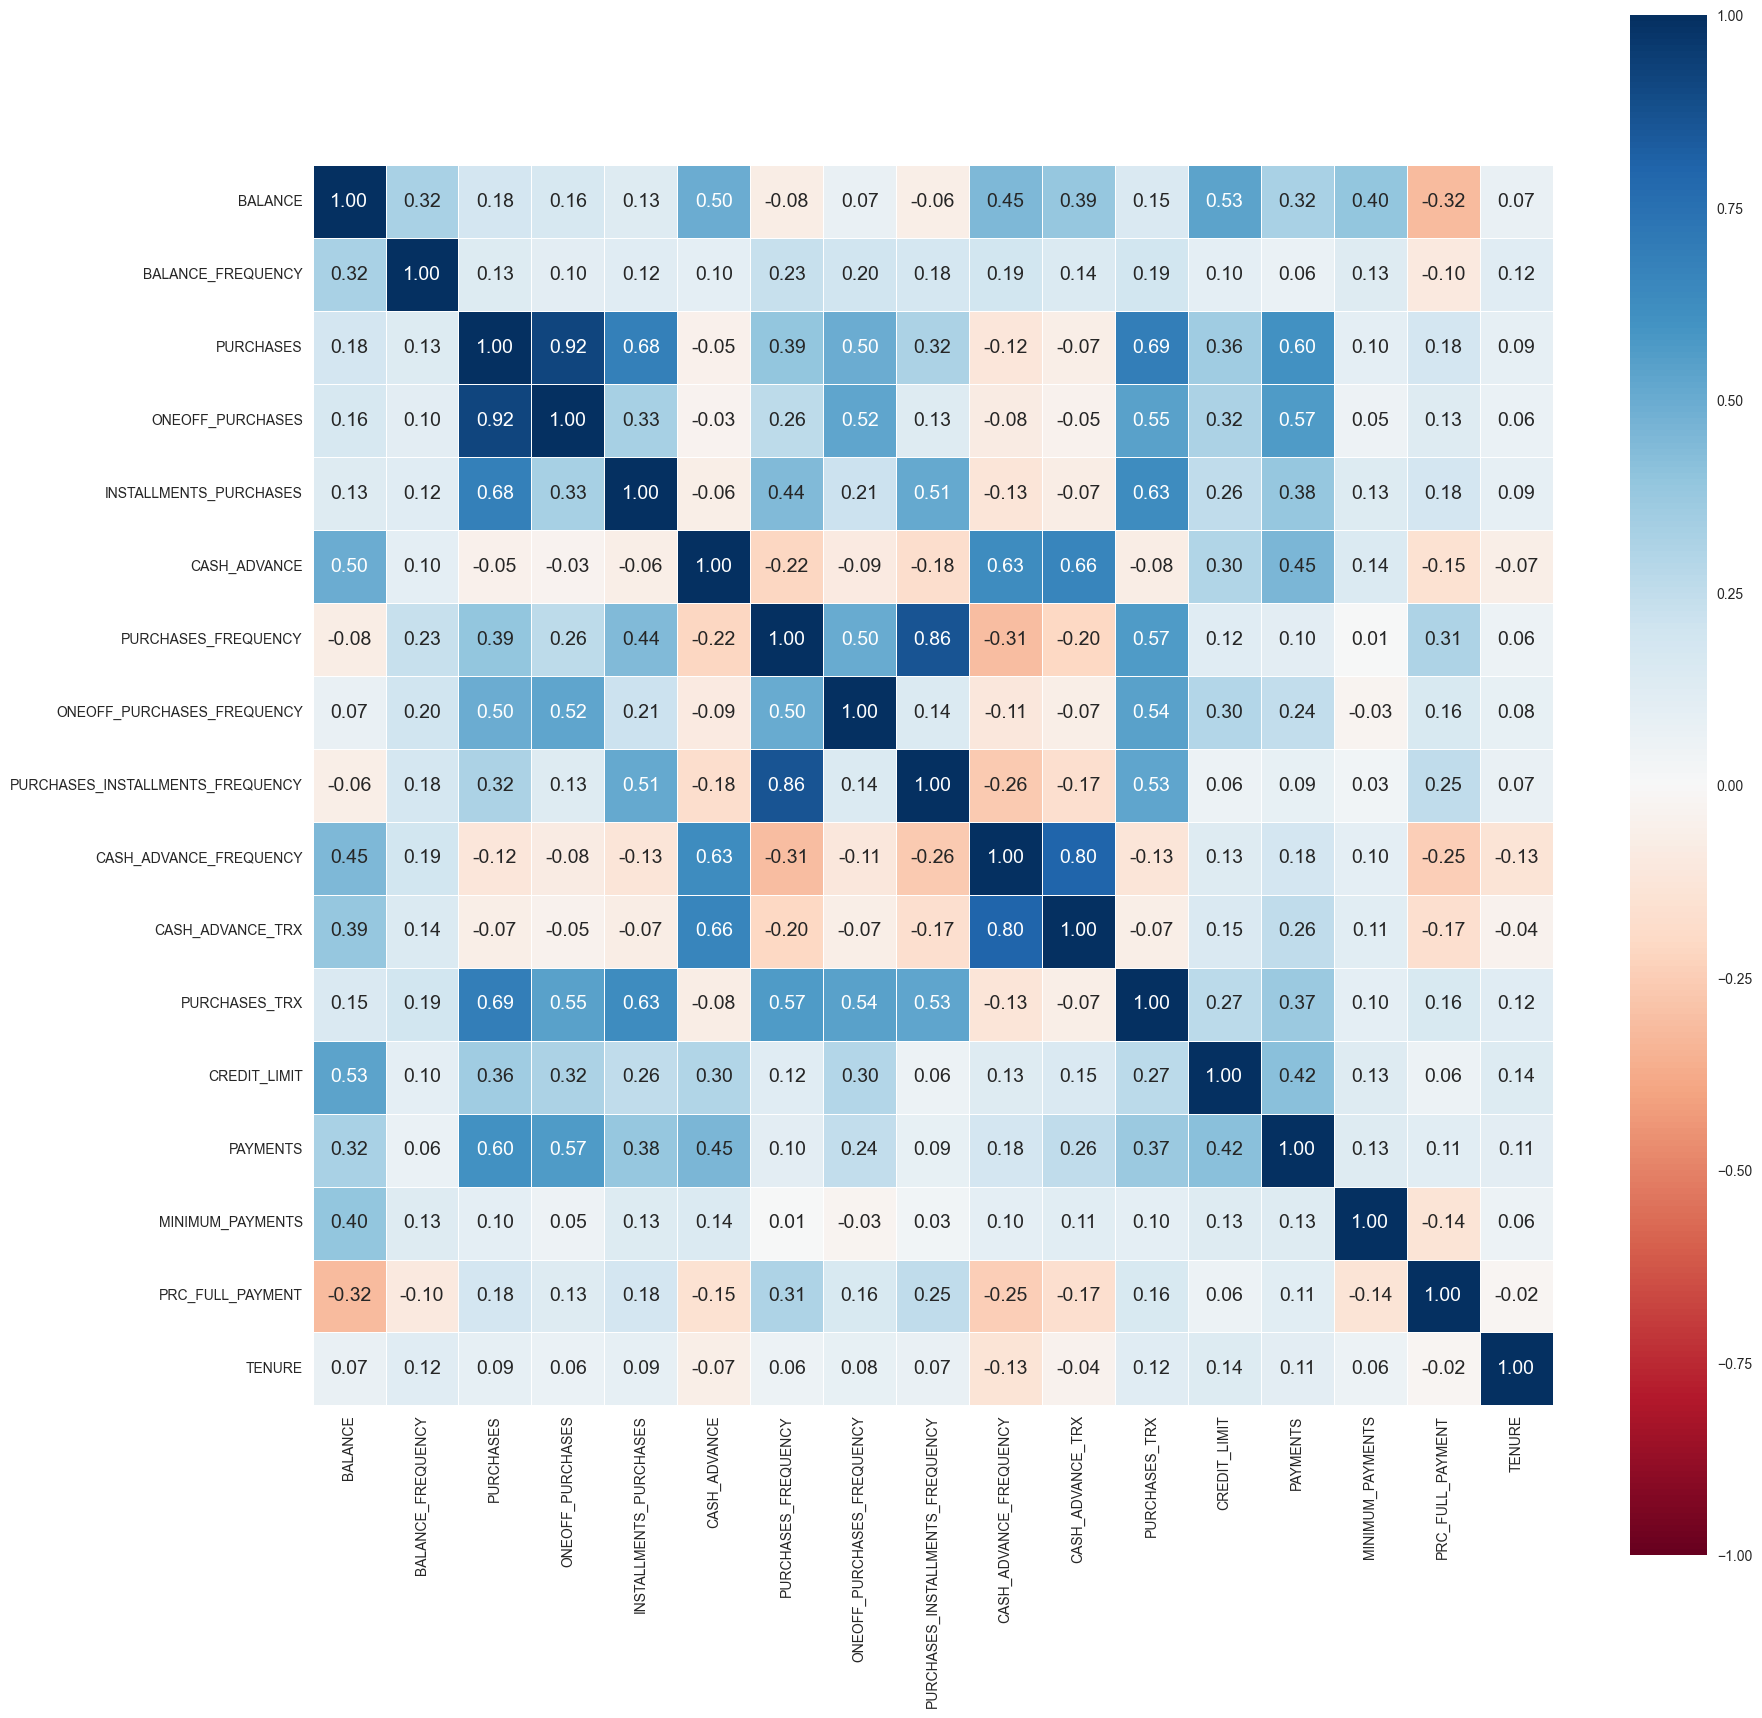

In [180]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, fmt='.2f', cmap='RdBu', annot_kws={'size':14},square=True, vmax=1, vmin=-1,)

Terlihat bahwa terdapat korelasi yang kuat (> 0,8), maka dapat diketahui bahwa terdapat korelasi antar fitur yaitu sebagai berikut:
**Korelasi yang sangat kuat:**<br>
- `purchases_installments_frequency` dan `purchases_frequency` dengan nilai korelasi 0.86. Hal tersebut dapat diartikan bahwa pembayaran dengan metode cicilan sering terjadi.
- `cash_advance_trx` dan `cash_advance_frequency` dengan nilai korelasi 0,8. Hal tersebut menunjukkan bahwa pembayaran di muka sering terjadi.
- `oneoff_purchases` dan `purchases` dengan nilai korelasi 0.92. Hal tersebut karena pembelian satu kali merupakan bagian dari pembelian.



# __E. PREPROCESSING DATA__

## 1. Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMaxScaler dimana kami ingin ingin mempertahankan skala relatif data asli. Transform feature dilakukan dengan mengubah setiap data ke range tertentu antara 0-1

In [181]:
df_scaler = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [182]:
df_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,0.082163,0.109309,0.0,0.006741,0.045879,0.107880,1.0
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8949.0,0.020459,0.043572,0.0,0.000812,0.007371,0.022638,1.0
ONEOFF_PURCHASES,8949.0,0.014536,0.040724,0.0,0.000000,0.000932,0.014176,1.0
INSTALLMENTS_PURCHASES,8949.0,0.018272,0.040195,0.0,0.000000,0.003956,0.020829,1.0
CASH_ADVANCE,8949.0,0.020768,0.044493,0.0,0.000000,0.000000,0.023630,1.0
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8949.0,0.090094,0.133422,0.0,0.000000,0.000000,0.148148,1.0


## 2. Hierarchical Clustering Dendrogram
Visualisasi dendogram membantu untuk memahami struktur hierarki dan hubungan antara klaster atau kelompok data dalam analisis Hierarchical Clustering. Dalam dendrogram, sumbu x menunjukkan data poin, sedangkan sumbu y menunjukkan jarak antara klaster atau kelompok data. Tinggi setiap cabang pada dendrogram menunjukkan jarak atau kesamaan antara klaster atau kelompok data tersebut.

In [183]:
import scipy.cluster.hierarchy as sch

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0],
  [325.0, 325.0, 335.0, 335.0],
  [345

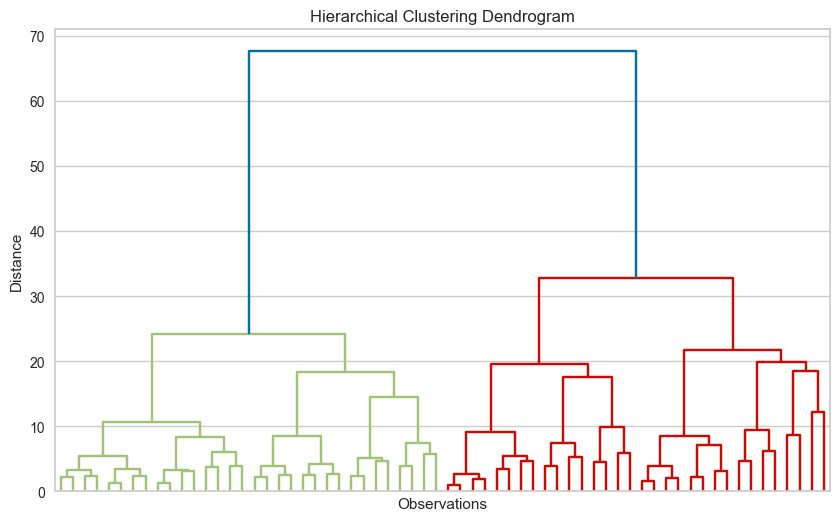

In [184]:
linkage_matrix = sch.linkage(df_scaler, method='ward')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True)

Penentuan banyak cluster dari dendrogram dapat dilakukan dengan mencari garis vertikal terpanjang di mana dia tidak berpotongan dengan garis horizontal manapun. Dari gambar di atas diperoleh bahwa banyak kluster yang optimal yakni 4 kluster.

# __F. MODELLING__
-------

## 1. Model Defining
- K-Means 
  <br>K-means adalah salah satu algoritma clustering yang populer dalam machine learning. Tujuannya adalah untuk mengelompokkan data ke dalam beberapa kelompok berdasarkan kesamaan fitur. Model K-Means mencoba meminimalkan jumlah variansi dalam setiap kelompok dengan menempatkan pusat kelompok yang optimal. 

- K-Medoids
  <br> K-Medoids, juga dikenal sebagai Partitioning Around Medoids (PAM), adalah variasi dari algoritma K-Means yang menggunakan medoid sebagai pusat kelompok. Medoid adalah titik data dalam kelompok yang memiliki jarak total minimum ke semua titik data lainnya dalam kelompok.

In [185]:
model_df = df_scaler.copy()

In [186]:
# Model K-means
kmeans = KMeans(n_clusters=4)

In [187]:
# Model K-medoids
kmedoids = KMedoids(n_clusters=4)

## 2. Melatih Model

In [188]:
# melatih model K-means
kmeans.fit(model_df)

KMeans(n_clusters=4)

In [189]:
# melatih model Kmedoids
kmedoids.fit(model_df)

KMedoids(n_clusters=4)

## 3. Evaluasi Model
- Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
- Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.



### - K-Means model

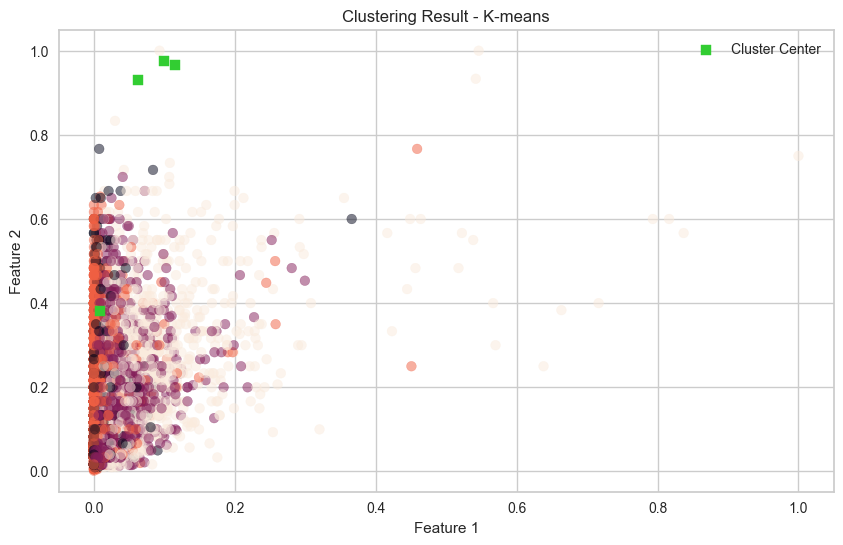

-------------------- Using K-Means Model -------------------------------
Davies-Bouldin index = 1.4233658194813423
Silhouette Score = 0.32150303017845605



In [190]:
centers1 = kmeans.cluster_centers_

# Visualize cluster centers
plt.figure(figsize=(10,6))
plt.scatter(model_df['PURCHASES'], model_df['CREDIT_LIMIT'], c=kmeans.labels_, cmap='rocket', alpha=0.5)
plt.scatter(centers1[:, 0], centers1[:, 1], c='limegreen', marker='s', label='Cluster Center')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result - K-means')
plt.legend()
plt.show()

print("-------------------- Using K-Means Model -------------------------------")
print(f'Davies-Bouldin index = {davies_bouldin_score(model_df, kmeans.labels_)}')
print(f'Silhouette Score = {silhouette_score(model_df, kmeans.labels_)}\n')

### - K-Medoids model

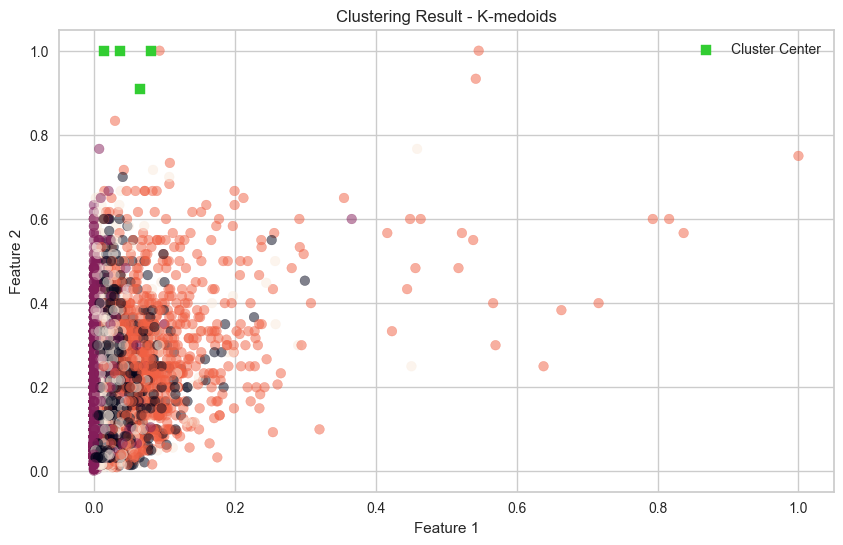

-------------------- Using K-Medoids -------------------------------
Davies-Bouldin index = 1.6202647553499647
Silhouette Score = 0.24415640694533997


In [191]:
centers2 = kmedoids.cluster_centers_

# Visualize cluster centers
plt.figure(figsize=(10,6))
plt.scatter(model_df['PURCHASES'], model_df['CREDIT_LIMIT'], c=kmedoids.labels_, cmap='rocket', alpha=0.5)
plt.scatter(centers2[:, 0], centers2[:, 1], c='limegreen', marker='s', label='Cluster Center')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result - K-medoids')
plt.legend()
plt.show()

print("-------------------- Using K-Medoids -------------------------------")
print(f'Davies-Bouldin index = {davies_bouldin_score(model_df, kmedoids.labels_)}')
print(f'Silhouette Score = {silhouette_score(model_df, kmedoids.labels_)}')

### **Kesimpulan :**

Dapat dilihat bahwa dengan menggunakan **K-Means model** dapat **menghasilkan hasil cluster yang optimal** dapat dibuktikan dari score DBI paling mendekati 0 atau lebih kecil dibandingkan dengan metode K-Medoids dan score Silhouette yang mendekati 1 atau lebih besar dari K-Medoids.


# __G. K-Means Model__
------

## 1. Penentuan Jumlah Cluster Modeling
    Menggunakan metode Elbow. Titik 'elbow' atau 'siku' dalam plot WCSS adalah indikasi jumlah cluster yang optimal.

In [192]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaler)
    inertia.append(kmeans.inertia_)

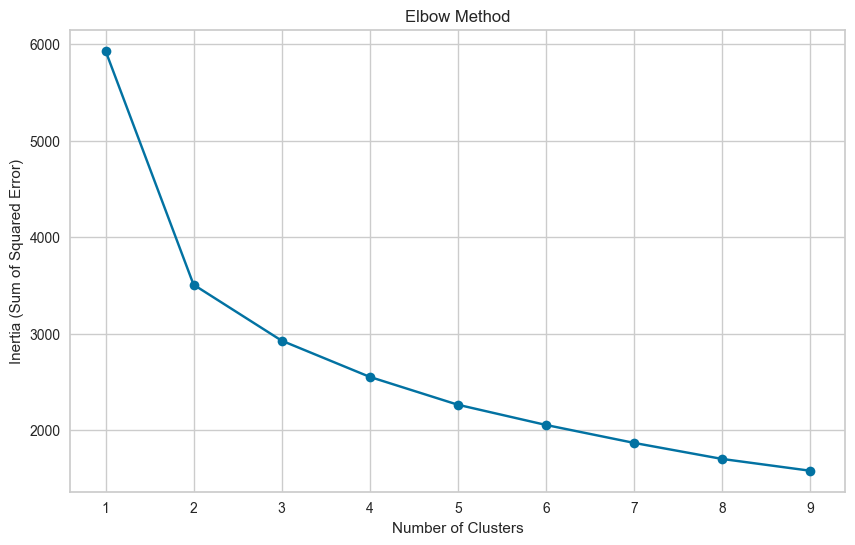

In [193]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Error)')
plt.title('Elbow Method')
plt.show()

## 2. Membentuk Model

In [194]:
df_kmeans = df_scaler.copy()

In [195]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans_model.fit_predict(df_kmeans)
kmeans_model.fit(df_kmeans)

KMeans(n_clusters=3, random_state=42)

In [196]:
df_kmeans['Cluster'] = kmeans_labels
df_kmeans['Cluster'].value_counts()

Cluster
0    4723
1    2783
2    1443
Name: count, dtype: int64

In [197]:
clustered_data = df_kmeans.groupby("Cluster").mean()

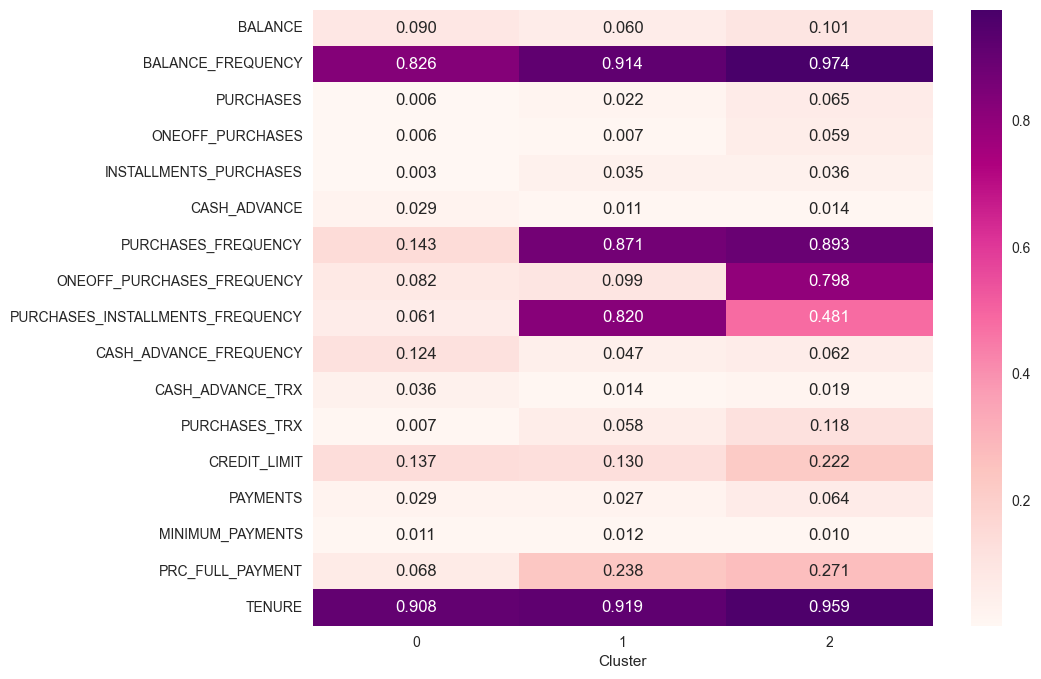

In [198]:
plt.figure(figsize=(10, 8))
sns.heatmap(clustered_data.T, cmap='RdPu', annot=True, fmt=".3f")
plt.show()

In [199]:
clustered_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,0.089549,0.826392,0.006031,0.005715,0.002800,0.028794,0.143219,0.081542,0.060573,0.123875,0.035956,0.007475,0.136615,0.029117,0.010800,0.068350,0.908003
1,0.059820,0.913869,0.021747,0.006598,0.035474,0.010669,0.870860,0.098692,0.819835,0.047141,0.014069,0.058154,0.130222,0.027445,0.012003,0.237883,0.919212
2,0.101082,0.973706,0.065199,0.058715,0.035735,0.013979,0.893007,0.798486,0.480963,0.062367,0.018998,0.118224,0.222007,0.063702,0.010086,0.270895,0.958651


In [200]:
print(f'Davies-Bouldin index = {davies_bouldin_score(df_kmeans, kmeans_labels)}')
print(f'Silhouette Score     = {silhouette_score(df_kmeans, kmeans_labels)}')

Davies-Bouldin index = 0.8497385945829833


Silhouette Score     = 0.5332658514456283


# **PCA- KMEANS**

In [201]:
data_pca = df_scaler.copy()

In [202]:
pca_Kmeans = PCA(n_components=0.9, random_state=42)
pca = pca_Kmeans.fit(data_pca)

In [203]:
m = ['PC'+str(n) for n in range(1, len(pca.components_)+1)]
df_PCA= pd.DataFrame(pca.transform(data_pca), columns=m)

In [204]:
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.482269,-0.097884,-0.046164,-0.057872,0.109999
1,-0.608709,-0.019549,0.082455,-0.218465,-0.098923
2,0.304349,0.921073,0.010665,0.159440,0.162258
3,-0.588699,-0.005678,0.037157,0.004825,0.223701
4,-0.554502,0.052616,-0.084019,-0.132619,-0.017021


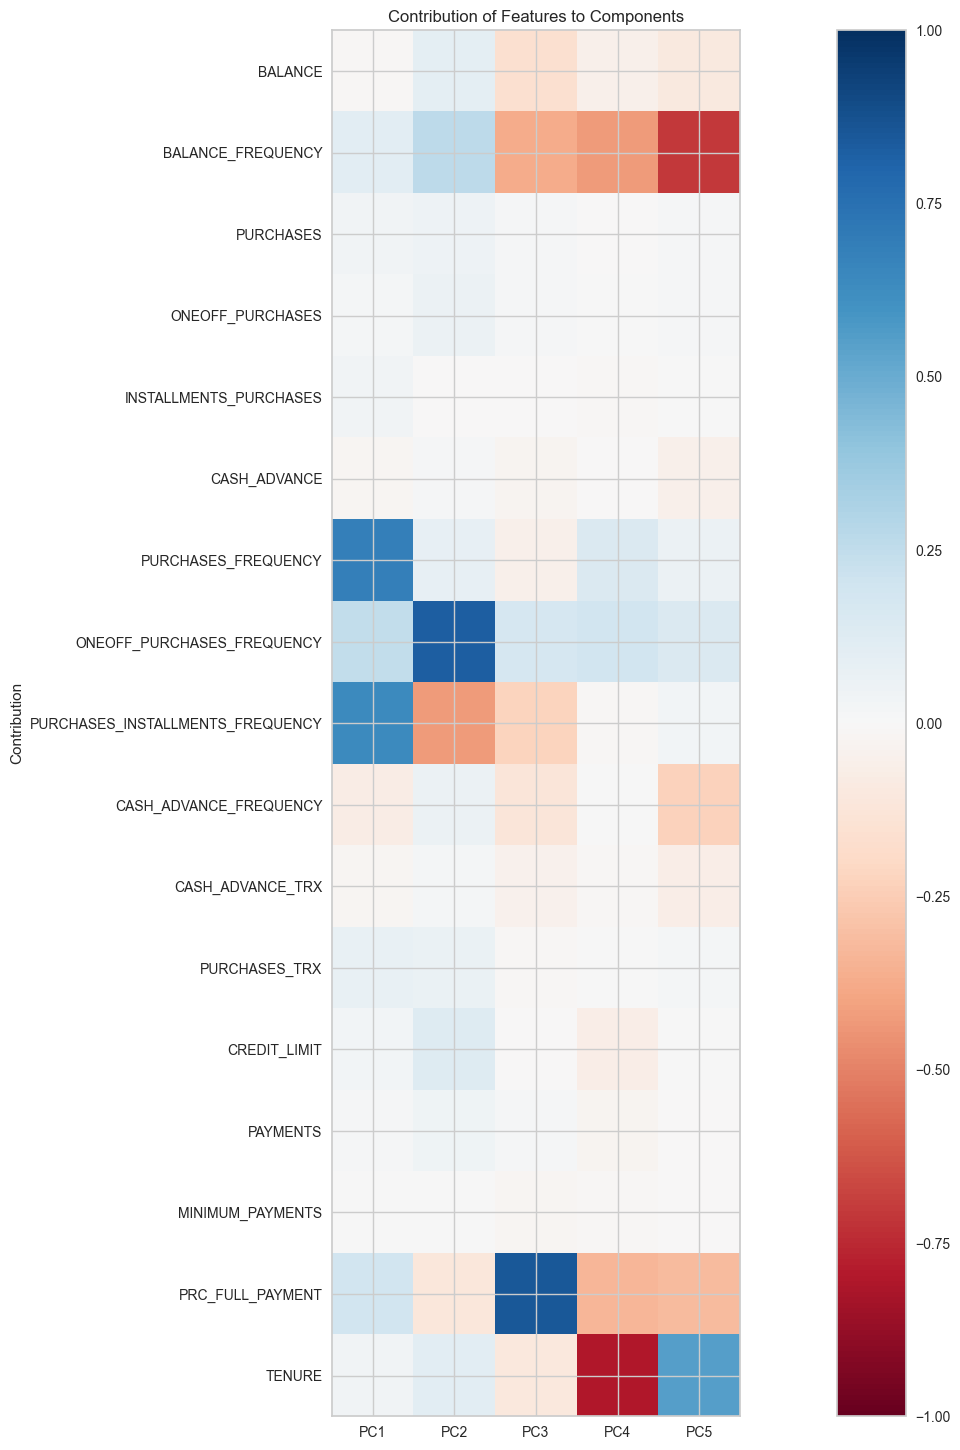

In [205]:
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca.components_.T,
           cmap="RdBu",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(data_pca.columns)), data_pca.columns)
plt.xticks(range(len(df_PCA.columns)), df_PCA.columns)
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

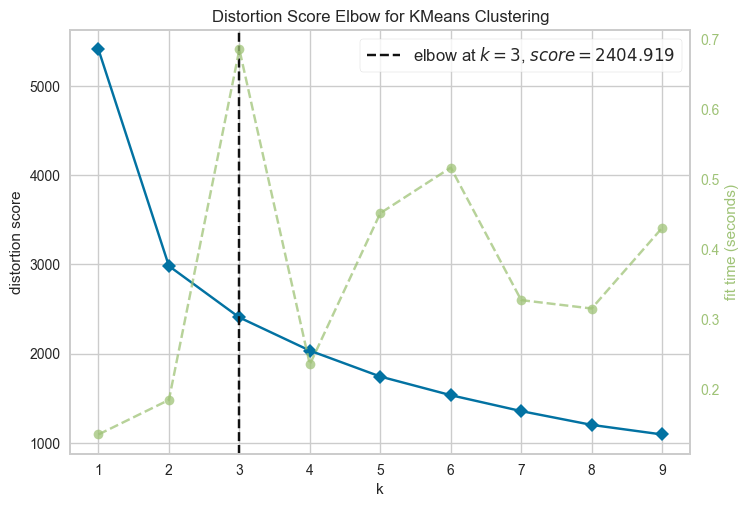

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [206]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_PCA)
visualizer.show()

## Membuat Model

In [207]:
Kmeans_PCAmodel = KMeans(visualizer.elbow_value_, random_state=42)
labels = Kmeans_PCAmodel.fit_predict(df_PCA)

In [208]:
data_pca['LABELS'] = labels
df_PCA['LABELS'] = labels

<Axes: title={'center': 'Using K-Means PCA Model'}, ylabel='count'>

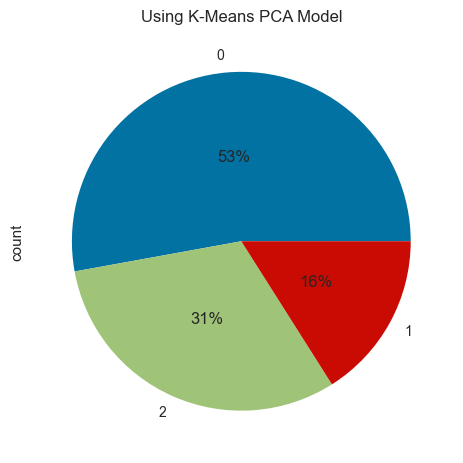

In [209]:
df_PCA.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1,
                                         title="Using K-Means PCA Model")


In [210]:
df_PCA.LABELS.value_counts()

LABELS
0    4730
2    2786
1    1433
Name: count, dtype: int64

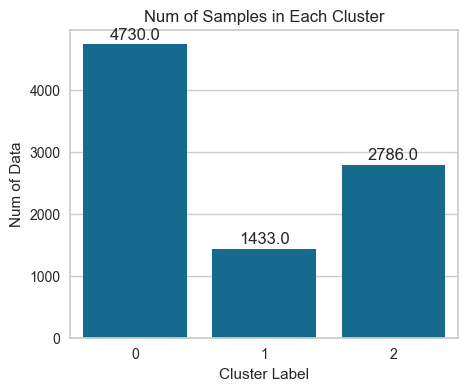

In [211]:
x = pd.Series(df_PCA.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

In [212]:
print("---------- Using PCA-Kmeans Model ----------")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_PCA, labels)}')
print(f'Silhouette Score = {silhouette_score(df_PCA, labels)}')

---------- Using PCA-Kmeans Model ----------
Davies-Bouldin index = 0.763510545151182


Silhouette Score = 0.5884353854639267


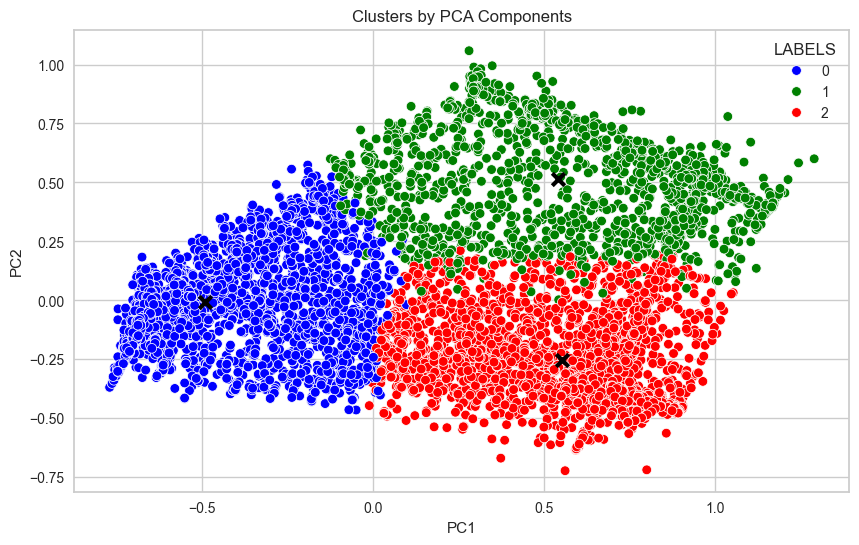

In [213]:
x_axis = df_PCA['PC1']
y_axis = df_PCA['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_PCA['LABELS'], palette=['blue','green','red'])
centroid = Kmeans_PCAmodel.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()

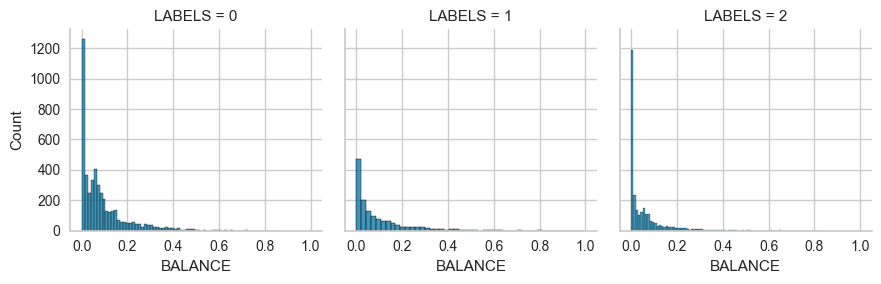

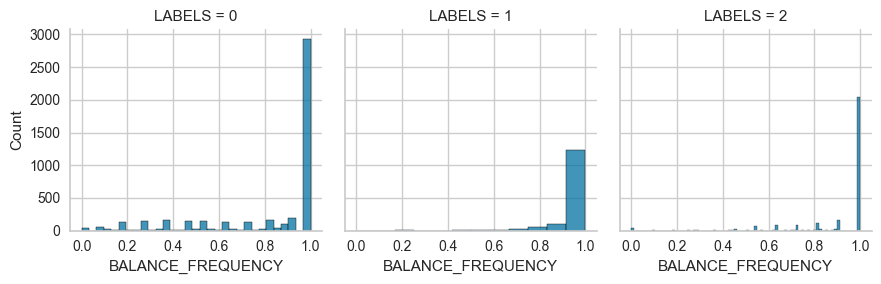

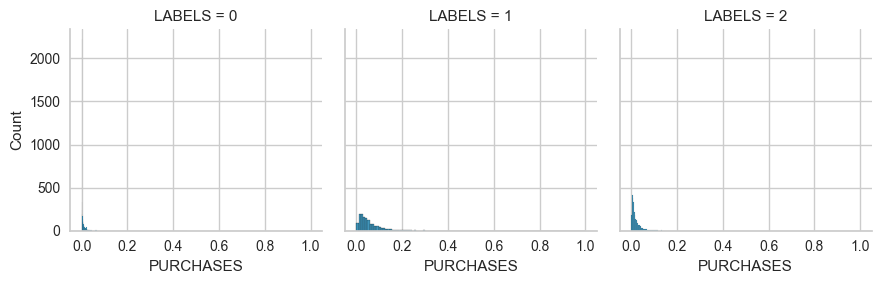

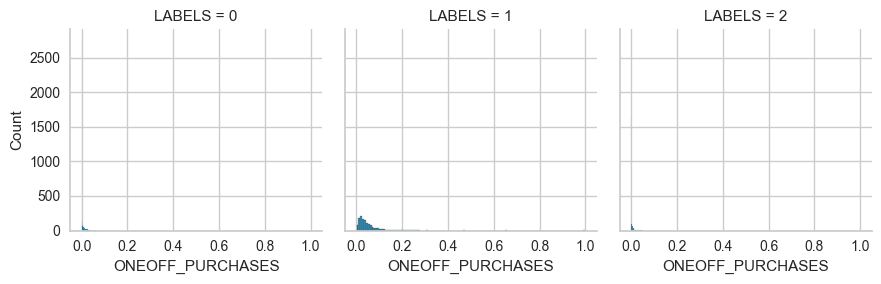

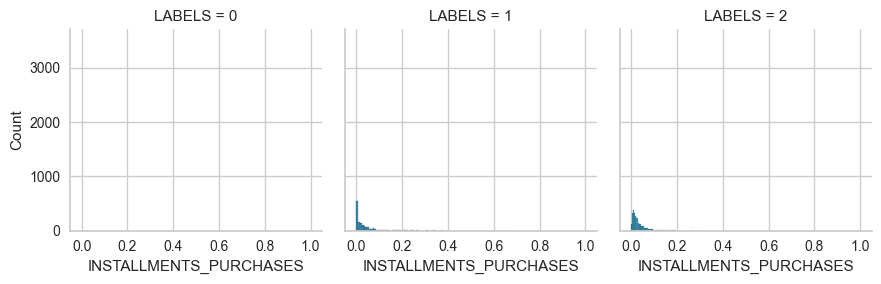

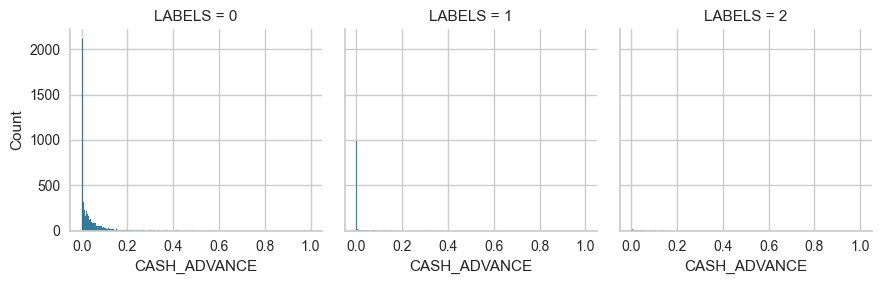

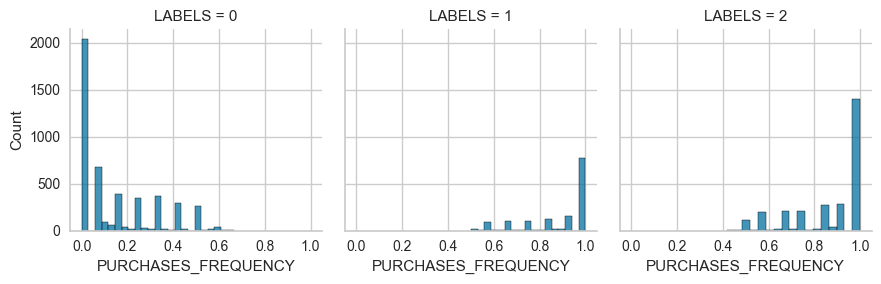

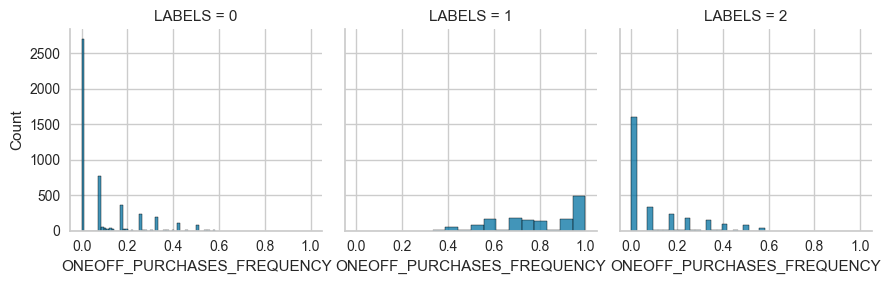

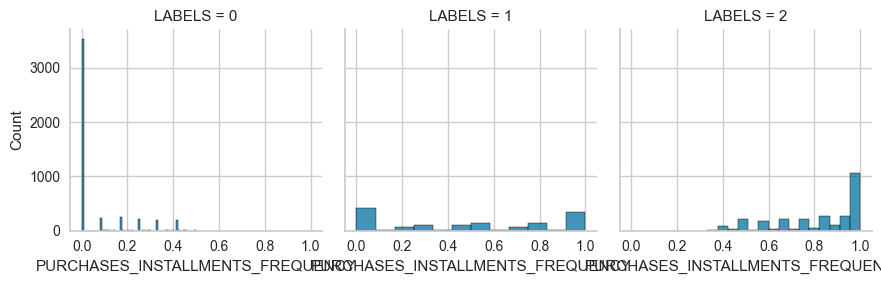

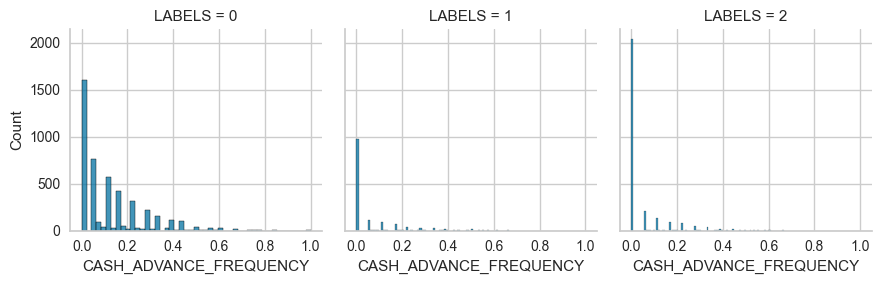

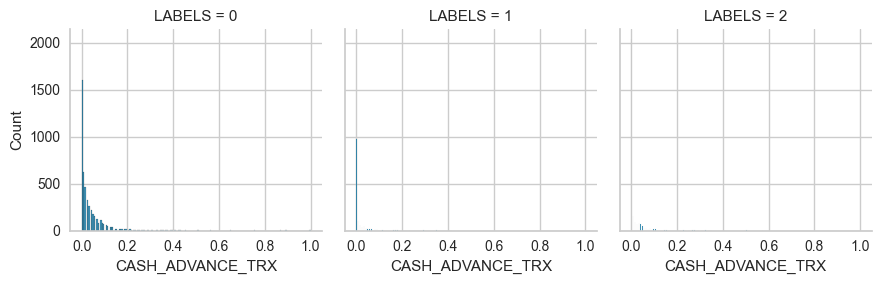

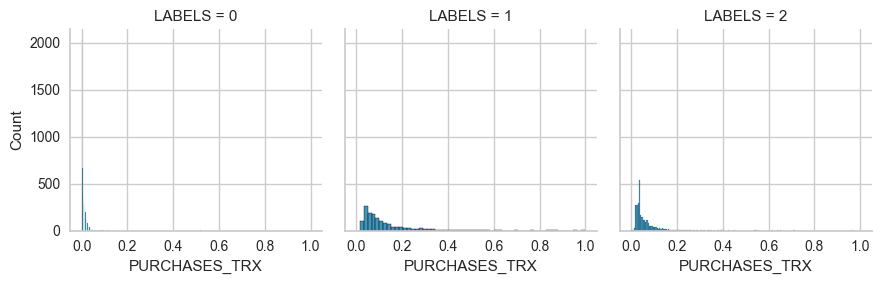

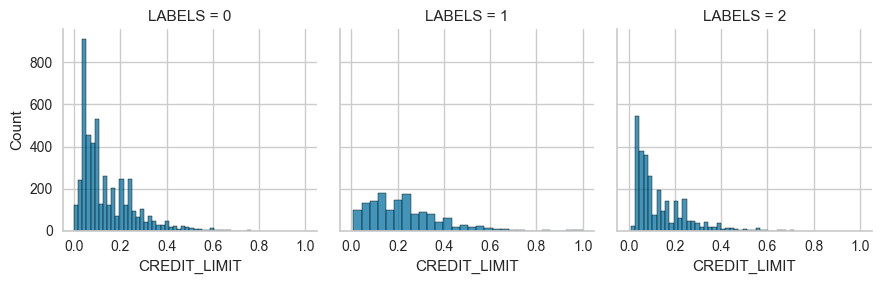

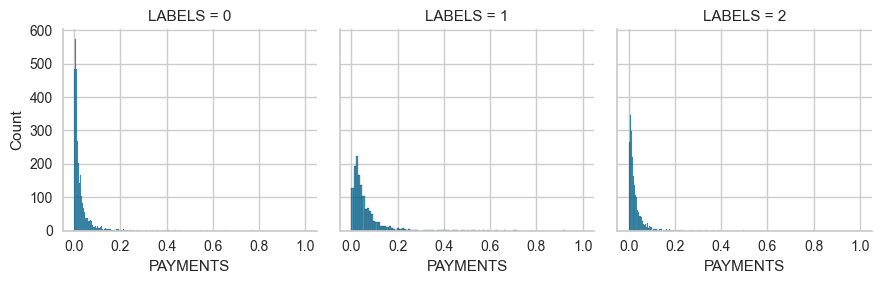

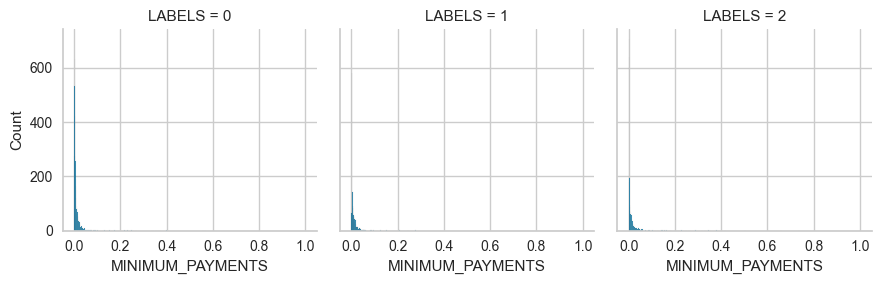

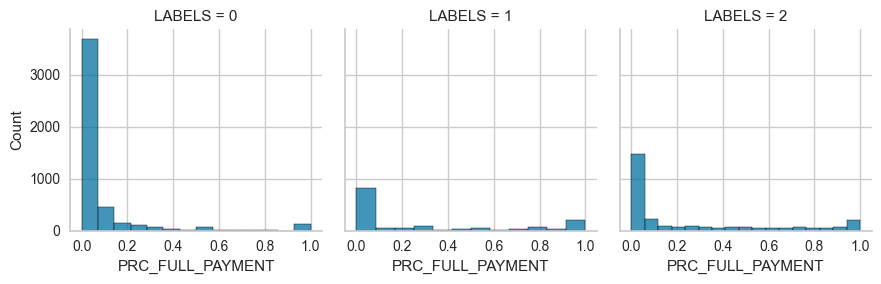

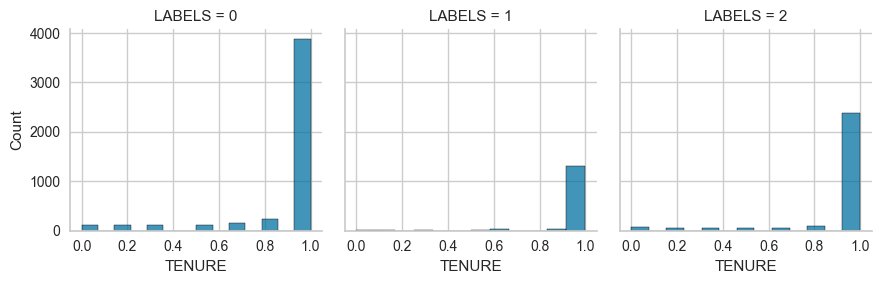

In [214]:
for x in data_pca.drop('LABELS', axis=1).columns:
    plot = sns.FacetGrid(data_pca, col='LABELS')
    plot.map(sns.histplot, x)

# Model Inference

In [215]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=5000, centers=3, cluster_std=0.60, random_state=42)

In [216]:
pc = PCA(n_components=0.9, random_state=42)
pc.fit(X)

PCA(n_components=0.9, random_state=42)

In [217]:
X_pca = pc.transform(X)

# Menggunakan KMeans untuk memprediksi cluster
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Memprediksi cluster untuk setiap sampel dalam data baru
y_pred = kmeans.predict(X_pca)

print('Cluster Centers:', kmeans.cluster_centers_)
print('Labels:', kmeans.labels_)

Cluster Centers: [[-3.29786951  5.29560272]
 [ 9.7462934  -1.02953022]
 [-6.44257729 -4.2666901 ]]
Labels: [0 0 2 ... 0 2 0]


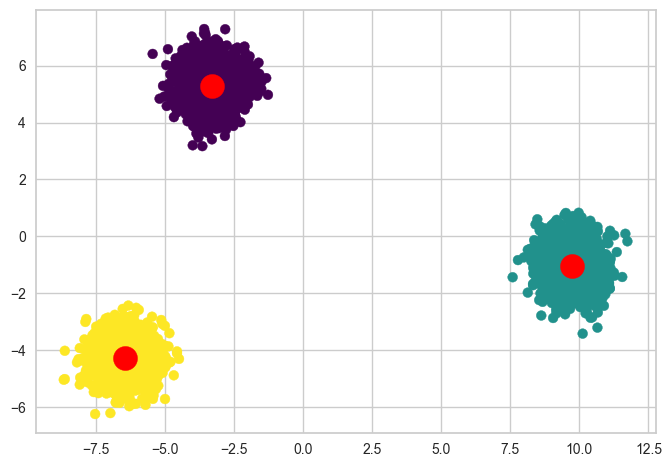

In [219]:
import matplotlib.pyplot as plt
# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, c=kmeans.labels_, cmap='viridis')
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()